In [65]:
######################### MODELING ##########################
# --- Étape 0 : Chargement des librairies ---
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Chargement du dataset préparé (avec normalisation incluse)
df = pd.read_csv("../data/processed/prepared_dataset_normalized.csv")

In [67]:
# Vérification rapide des dimensions et des colonnes
print("Shape du dataset :", df.shape)
print("Colonnes disponibles :", df.columns.tolist())

Shape du dataset : (7032, 24)
Colonnes disponibles : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [68]:
# Cible
target = "Churn"

In [69]:
#  Séparation des features (X) et de la variable cible (y)
X = df.drop(columns=[target])
y = df[target]

In [70]:
#  Split en train et test (80% - 20%), stratifié pour garder même proportion de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vérification des shapes
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

# Vérification de la proportion de churn dans les deux ensembles
print("\nRépartition du churn dans y_train :")
print(y_train.value_counts(normalize=True) * 100)

print("\nRépartition du churn dans y_test :")
print(y_test.value_counts(normalize=True) * 100)

X_train : (5625, 23)
X_test : (1407, 23)
y_train : (5625,)
y_test : (1407,)

Répartition du churn dans y_train :
Churn
0    73.422222
1    26.577778
Name: proportion, dtype: float64

Répartition du churn dans y_test :
Churn
0    73.418621
1    26.581379
Name: proportion, dtype: float64


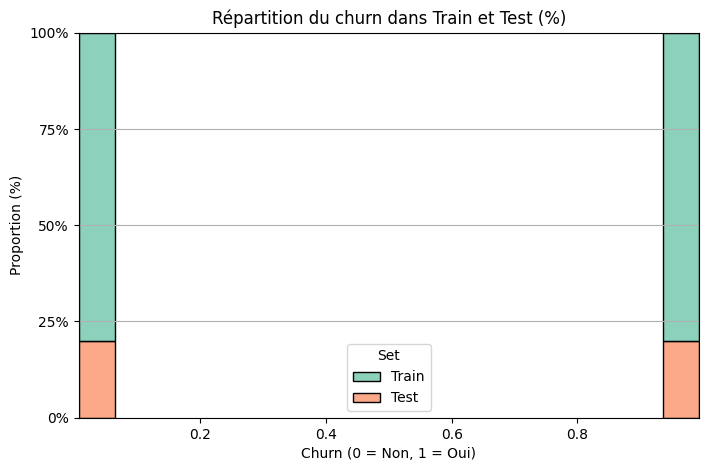

Train set :
 - Non-Churn : 73.4%
 - Churn     : 26.6%

Test set :
 - Non-Churn : 73.4%
 - Churn     : 26.6%

Interprétation :
 Les proportions sont bien équilibrées entre Train et Test.


In [71]:
# Construction du DataFrame combiné
train_labels = pd.DataFrame({"Churn": y_train, "Set": "Train"})
test_labels = pd.DataFrame({"Churn": y_test, "Set": "Test"})
combined = pd.concat([train_labels, test_labels])

# Graphique
plt.figure(figsize=(8, 5))
sns.histplot(
    data=combined,
    x="Churn",
    hue="Set",
    multiple="fill",  # pourcentage
    shrink=0.8,
    palette="Set2"
)
plt.title("Répartition du churn dans Train et Test (%)")
plt.xlabel("Churn (0 = Non, 1 = Oui)")
plt.ylabel("Proportion (%)")
plt.yticks([0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"])
plt.grid(axis="y")
plt.show()

# Pourcentages numériques
train_pct = y_train.value_counts(normalize=True) * 100
test_pct = y_test.value_counts(normalize=True) * 100

print("Train set :")
print(f" - Non-Churn : {train_pct[0]:.1f}%")
print(f" - Churn     : {train_pct[1]:.1f}%\n")

print("Test set :")
print(f" - Non-Churn : {test_pct[0]:.1f}%")
print(f" - Churn     : {test_pct[1]:.1f}%\n")

# Interprétation
print("Interprétation :")
if abs(train_pct[1] - test_pct[1]) <= 1:
    print(" Les proportions sont bien équilibrées entre Train et Test.")
else:
    print("Déséquilibre détecté : vérifier l'option `stratify=y` dans le split.")

In [72]:
####################################   Regression Logistique ######################################
# Imports nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, f1_score

In [73]:
# Creation et Entraînement du modèle de régression logistique
# Split avec random_state fixé
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [74]:
# Prédiction sur le test set
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # probabilité pour la classe "1"
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nRecall :\n", recall_score(y_test, y_pred))
print("\nf1-score :\n", f1_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC :", roc_auc_score(y_test, y_proba))

# Accuracy = 0,80 => prédit 80% des cas
# Classification 
# non-churn(0) => precision = 0,85 / recall = 0,89 / F1 = 0,87 => bon equilibre entre precision et recall
# churn (1) => precision = 0,65 / recall = 0,57 / F1 = 0,60 => performence correcte mais pas assez précise
# moyenne : macro avg = 0,74 / weighted avg = 0,80 => très équilibré entre les 2 classes 

Accuracy : 0.7263681592039801

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407


Recall :
 0.7994652406417112

f1-score :
 0.6083418107833164

Matrice de confusion :
 [[723 310]
 [ 75 299]]

ROC-AUC : 0.8354165480325721


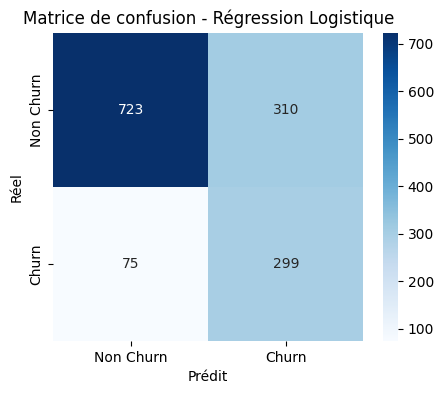

Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



In [75]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# 918 vrais négatifs (TN) : clients restés correctement prédits.
# 115 faux positifs (FP) : prédits churn mais restés → pas trop problématique.
# 162 faux négatifs (FN) : vrais churn que le modèle n’a pas détectés → c’est le point faible.
# 212 vrais positifs (TP) : churn correctement détectés.
# Le modèle est meilleur pour reconnaître les non-churn (0) que les churn (1).


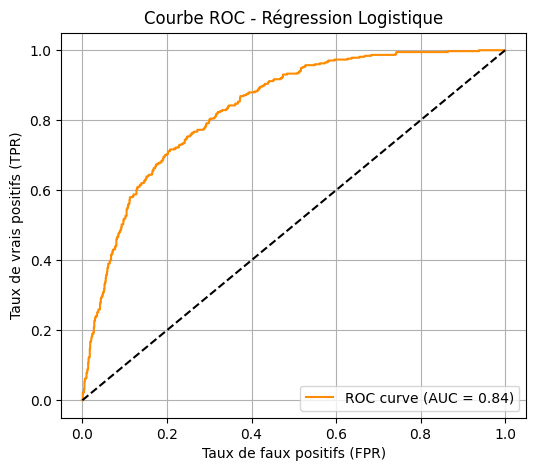

In [76]:
# AUC + ROC Curve
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--")  # ligne diagonale
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Cela veut dire que le modèle est capable de séparer les churners des non-churners dans 84% des cas.

In [77]:
# Analyse des coefficients
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeff_df["Impact"] = coeff_df["Coefficient"].apply(lambda x: "Augmente churn" if x > 0 else "Réduit churn")
print(coeff_df.head(10))  # Top variables


                                  Feature  Coefficient          Impact
16            InternetService_Fiber optic     1.019167  Augmente churn
15                           TotalCharges     0.599895  Augmente churn
21         PaymentMethod_Electronic check     0.412125  Augmente churn
11                            StreamingTV     0.341147  Augmente churn
12                        StreamingMovies     0.325062  Augmente churn
6                           MultipleLines     0.313746  Augmente churn
13                       PaperlessBilling     0.256589  Augmente churn
1                           SeniorCitizen     0.205200  Augmente churn
20  PaymentMethod_Credit card (automatic)     0.070106  Augmente churn
22             PaymentMethod_Mailed check     0.055362  Augmente churn


Top 10 variables influentes sur le churn :

                          Variable  Coefficient          Impact
19               Contract_Two year    -1.456218    Réduit churn
4                           tenure    -1.252034    Réduit churn
17              InternetService_No    -1.056148    Réduit churn
16     InternetService_Fiber optic     1.019167  Augmente churn
18               Contract_One year    -0.790352    Réduit churn
15                    TotalCharges     0.599895  Augmente churn
21  PaymentMethod_Electronic check     0.412125  Augmente churn
5                     PhoneService    -0.389032    Réduit churn
7                   OnlineSecurity    -0.368448    Réduit churn
11                     StreamingTV     0.341147  Augmente churn


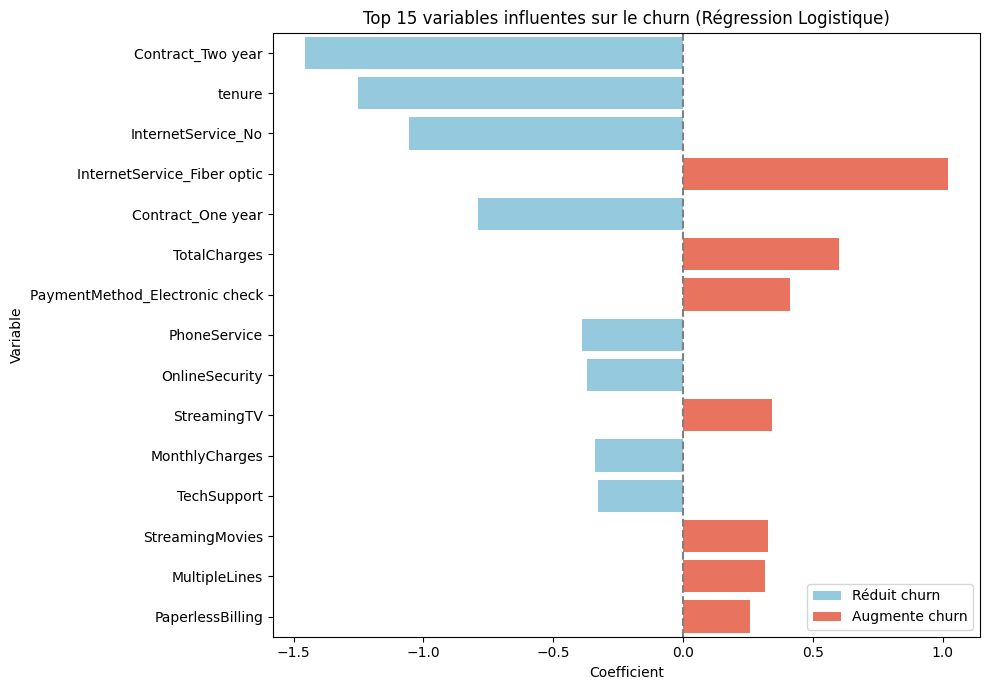

In [78]:
# Création du DataFrame avec les coefficients
coeff_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coefficient": logreg.coef_[0]
})

# Impact : positif (augmente le churn) ou négatif (le réduit)
coeff_df["Impact"] = coeff_df["Coefficient"].apply(lambda x: "Augmente churn" if x > 0 else "Réduit churn")

# Tri du plus influent au moins influent (absolu)
coeff_df["AbsValue"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by="AbsValue", ascending=False)

# Aperçu des top variables influentes
print("Top 10 variables influentes sur le churn :\n")
print(coeff_df[["Variable", "Coefficient", "Impact"]].head(10))

# Visualisation
plt.figure(figsize=(10, 7))
sns.barplot(
    data=coeff_df.head(15),
    x="Coefficient",
    y="Variable",
    hue="Impact",
    palette={"Augmente churn": "tomato", "Réduit churn": "skyblue"}
)
plt.title("Top 15 variables influentes sur le churn (Régression Logistique)")
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Chaque coefficient indique l’effet d’une variable sur la probabilité de churn.
# Signe positif (+) → la variable augmente le risque de churn.
# Signe négatif (-) → la variable réduit le risque de churn (protège contre le churn).
# Plus la valeur absolue est grande, plus l’impact est fort.

In [79]:
# Resultat coeff reduction churn
import pandas as pd

data = [
    {
        "Variable": "Contract_Two year",
        "Coefficient": -1.45,
        "Interprétation": "Les clients engagés sur deux ans sont beaucoup moins susceptibles de churner. Cela reflète une fidélité renforcée par l'engagement."
    },
    {
        "Variable": "tenure",
        "Coefficient": -1.25,
        "Interprétation": "Plus un client est ancien, plus il est fidèle. Les nouveaux clients sont plus à risque."
    },
    {
        "Variable": "InternetService_No",
        "Coefficient": -1.05,
        "Interprétation": "Les clients n'ayant pas d'abonnement Internet quittent moins souvent, probablement car ils ont des besoins plus simples ou sont moins ciblés par la concurrence."
    },
    {
        "Variable": "Contract_One year",
        "Coefficient": -0.79,
        "Interprétation": "Un contrat d'un an protège aussi contre le churn, même si l'effet est un peu moins fort qu'un contrat deux ans."
    },
    {
        "Variable": "PhoneService",
        "Coefficient": -0.38,
        "Interprétation": "Les clients ayant un service téléphonique quittent moins. Cela peut s'expliquer par un usage multiple des services, rendant la résiliation moins probable."
    },
    {
        "Variable": "OnlineSecurity",
        "Coefficient": -0.36,
        "Interprétation": "Le service de sécurité en ligne réduit le churn : c'est un facteur de satisfaction ou d'attachement."
    },
    {
        "Variable": "TechSupport",
        "Coefficient": -0.36,
        "Interprétation": "Le support technique est un levier de fidélisation : les clients aidés sont plus enclins à rester."
    }
]

coeff_interpret = pd.DataFrame(data)
pd.set_option("display.max_colwidth", None)
display(coeff_interpret)


,Variable,Coefficient,Interprétation
0,Contract_Two year,-1.45,Les clients engagés sur deux ans sont beaucoup moins susceptibles de churner. Cela reflète une fidélité renforcée par l'engagement.
1,tenure,-1.25,"Plus un client est ancien, plus il est fidèle. Les nouveaux clients sont plus à risque."
2,InternetService_No,-1.05,"Les clients n'ayant pas d'abonnement Internet quittent moins souvent, probablement car ils ont des besoins plus simples ou sont moins ciblés par la concurrence."
3,Contract_One year,-0.79,"Un contrat d'un an protège aussi contre le churn, même si l'effet est un peu moins fort qu'un contrat deux ans."
4,PhoneService,-0.38,"Les clients ayant un service téléphonique quittent moins. Cela peut s'expliquer par un usage multiple des services, rendant la résiliation moins probable."
5,OnlineSecurity,-0.36,Le service de sécurité en ligne réduit le churn : c'est un facteur de satisfaction ou d'attachement.
6,TechSupport,-0.36,Le support technique est un levier de fidélisation : les clients aidés sont plus enclins à rester.


In [80]:
# Resultat coeff augmentation churn
import pandas as pd

data_pos = [
    {
        "Variable": "InternetService_Fiber optic",
        "Coefficient": +1.01,
        "Interprétation": "Les utilisateurs de fibre sont plus exigeants ou plus exposés à la concurrence, ce qui augmente le risque de churn."
    },
    {
        "Variable": "TotalCharges",
        "Coefficient": +0.64,
        "Interprétation": "Un montant total élevé peut refléter un mécontentement lié au prix ou une perception de faible valeur."
    },
    {
        "Variable": "PaymentMethod_Electronic check",
        "Coefficient": +0.39,
        "Interprétation": "Ce moyen de paiement est associé à des profils clients plus à risque, avec moins d'automatisation ou plus de défauts de paiement."
    }
]

coeff_interpret_pos = pd.DataFrame(data_pos)

# Affichage sans coupure de texte
pd.set_option("display.max_colwidth", None)
display(coeff_interpret_pos)


,Variable,Coefficient,Interprétation
0,InternetService_Fiber optic,1.01,"Les utilisateurs de fibre sont plus exigeants ou plus exposés à la concurrence, ce qui augmente le risque de churn."
1,TotalCharges,0.64,Un montant total élevé peut refléter un mécontentement lié au prix ou une perception de faible valeur.
2,PaymentMethod_Electronic check,0.39,"Ce moyen de paiement est associé à des profils clients plus à risque, avec moins d'automatisation ou plus de défauts de paiement."


In [81]:
# Conclusion Regression Logistique
import pandas as pd

conclusion_data = [
    {
        "Aspect": "Performance globale",
        "Conclusion": "Accuracy ~73% et ROC-AUC 0.83 : modèle solide comme baseline."
    },
    {
        "Aspect": "Détection churn",
        "Conclusion": "Recall churners = 70% → bonne détéction mais améliorable car certains churners ne sont pas détectés."
    },
    {
        "Aspect": "Facteurs de risque",
        "Conclusion": "Contrat mensuel, frais mensuels élevés, fibre optique, paiement par Electronic check."
    },
    {
        "Aspect": "Facteurs protecteurs",
        "Conclusion": "Ancienneté, contrats longs (1 ou 2 ans), paiements automatiques, services additionnels."
    },
    {
        "Aspect": "Amélioration du ciblage",
        "Conclusion": "Cibler les clients récents, mensuels, avec charges élevées et Electronic check pour réduire le churn."
    },
    {
        "Aspect": "Conclusion générale",
        "Conclusion": "Modèle interprétable et utile pour l’analyse. Limité pour recall churn → comparer avec modèles plus puissants"
    }
]

df_conclusion = pd.DataFrame(conclusion_data)

# Affichage sans coupure de texte
pd.set_option("display.max_colwidth", None)
display(df_conclusion)


,Aspect,Conclusion
0,Performance globale,Accuracy ~73% et ROC-AUC 0.83 : modèle solide comme baseline.
1,Détection churn,Recall churners = 70% → bonne détéction mais améliorable car certains churners ne sont pas détectés.
2,Facteurs de risque,"Contrat mensuel, frais mensuels élevés, fibre optique, paiement par Electronic check."
3,Facteurs protecteurs,"Ancienneté, contrats longs (1 ou 2 ans), paiements automatiques, services additionnels."
4,Amélioration du ciblage,"Cibler les clients récents, mensuels, avec charges élevées et Electronic check pour réduire le churn."
5,Conclusion générale,Modèle interprétable et utile pour l’analyse. Limité pour recall churn → comparer avec modèles plus puissants


In [82]:
######################## ARBRE DE DECSION ############################
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
# Initialisation du modèle Arbre de Décision
tree = DecisionTreeClassifier(
    max_depth=5,          # limite la profondeur (évite le surapprentissage)
    class_weight="balanced",  # gère le déséquilibre
    random_state=42
)

#  Entraînement
tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [84]:
# Prédictions sur le jeu de test
y_pred_tree = tree.predict(X_test)

# Probabilités (nécessaires pour la courbe ROC et AUC)
y_proba_tree = tree.predict_proba(X_test)[:, 1]


In [85]:
# Accuracy, Recall, F1, AUC
acc_tree = accuracy_score(y_test, y_pred_tree)
class_tree = classification_report(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, y_proba_tree)
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)

print(f"Decision Tree Classifier")
print(f"Accuracy : {acc_tree:.2f}")
print(f"Recall   : {recall_tree:.2f}")
print(f"F1-score : {f1_tree:.2f}")
print(f"AUC      : {auc_tree:.2f}")


Decision Tree Classifier
Accuracy : 0.71
Recall   : 0.78
F1-score : 0.59
AUC      : 0.82


In [86]:
print("Accuracy :", acc_tree)
print("\nClassification Report :\n", class_tree)
print("\nRecall :\n", recall_tree)
print("\nF1-score :\n", f1_tree)
print("\nMatrice de confusion :\n", conf_mat_tree)
print("\nROC-AUC :", auc_tree)

# Classe 0 (Non-Churn)
# Precision = 0.90 → quand l’arbre prédit Non-Churn, il a raison 90% du temps.
# Recall = 0.68 → il capture 68% des vrais non-churn (il en rate 32%).
# F1 = 0.77 → assez solide.

# Classe 1 (Churn)
# Precision = 0.47 → quand il prédit churn, il n’a raison que dans 47% des cas (beaucoup de faux positifs).
# Recall = 0.78 → il capture 78% des churners (bien meilleur que la régression logistique qui était à 57%).
# F1 = 0.59 → moyen, mais meilleure couverture des churners.
# L’arbre sacrifie de la précision pour augmenter le recall des churners.

Accuracy : 0.7057569296375267

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407


Recall :
 0.7834224598930482

F1-score :
 0.586

Matrice de confusion :
 [[700 333]
 [ 81 293]]

ROC-AUC : 0.8178932137846778


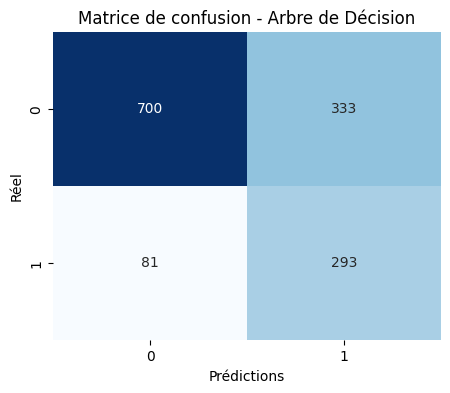

Rapport de classification - Arbre de Décision
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407



In [87]:
# Matrice de confusion
conf_mat_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion - Arbre de Décision")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


# Rapport de classification
print("Rapport de classification - Arbre de Décision")
print(classification_report(y_test, y_pred_tree))

# 700 vrais négatifs (TN) : non-churn bien prédits.
# 333 faux positifs (FP) : prédits churn mais en réalité restés.
# 81 faux négatifs (FN) : vrais churn non détectés.
# 293 vrais positifs (TP) : churn correctement détectés.

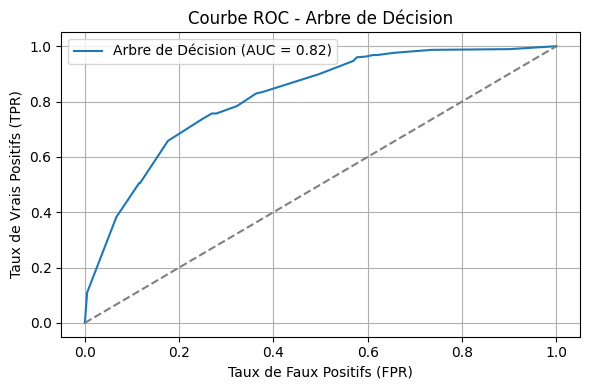

In [88]:
# Courbe ROC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)

plt.figure(figsize=(6, 4))
plt.plot(fpr_tree, tpr_tree, label=f"Arbre de Décision (AUC = {auc_tree:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Arbre de Décision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# l’arbre sépare bien les churners des non-churners globalement.

In [89]:
# Importance des variables
importances = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": tree.feature_importances_
})

# Trier les variables par importance
importances = importances.sort_values(by="Importance", ascending=False)


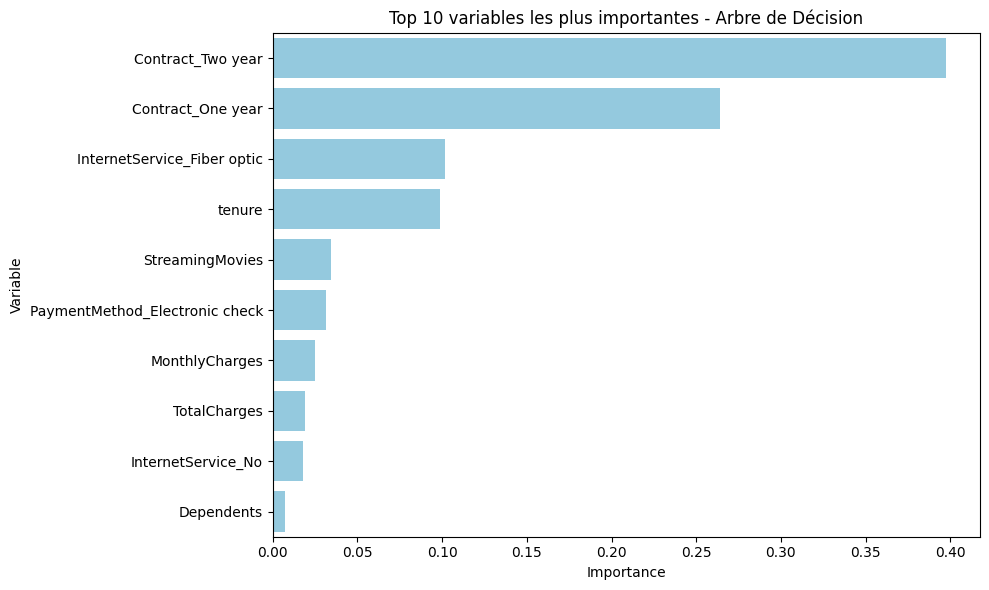

In [90]:
# Visualisation des 10 variables les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances.head(10),
    x="Importance",
    y="Variable",
    color="skyblue"
)
plt.title("Top 10 variables les plus importantes - Arbre de Décision")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [91]:
print(f"Profondeur de l’arbre : {tree.get_depth()}")
print(f"Nombre total de feuilles : {tree.get_n_leaves()}")


Profondeur de l’arbre : 5
Nombre total de feuilles : 28


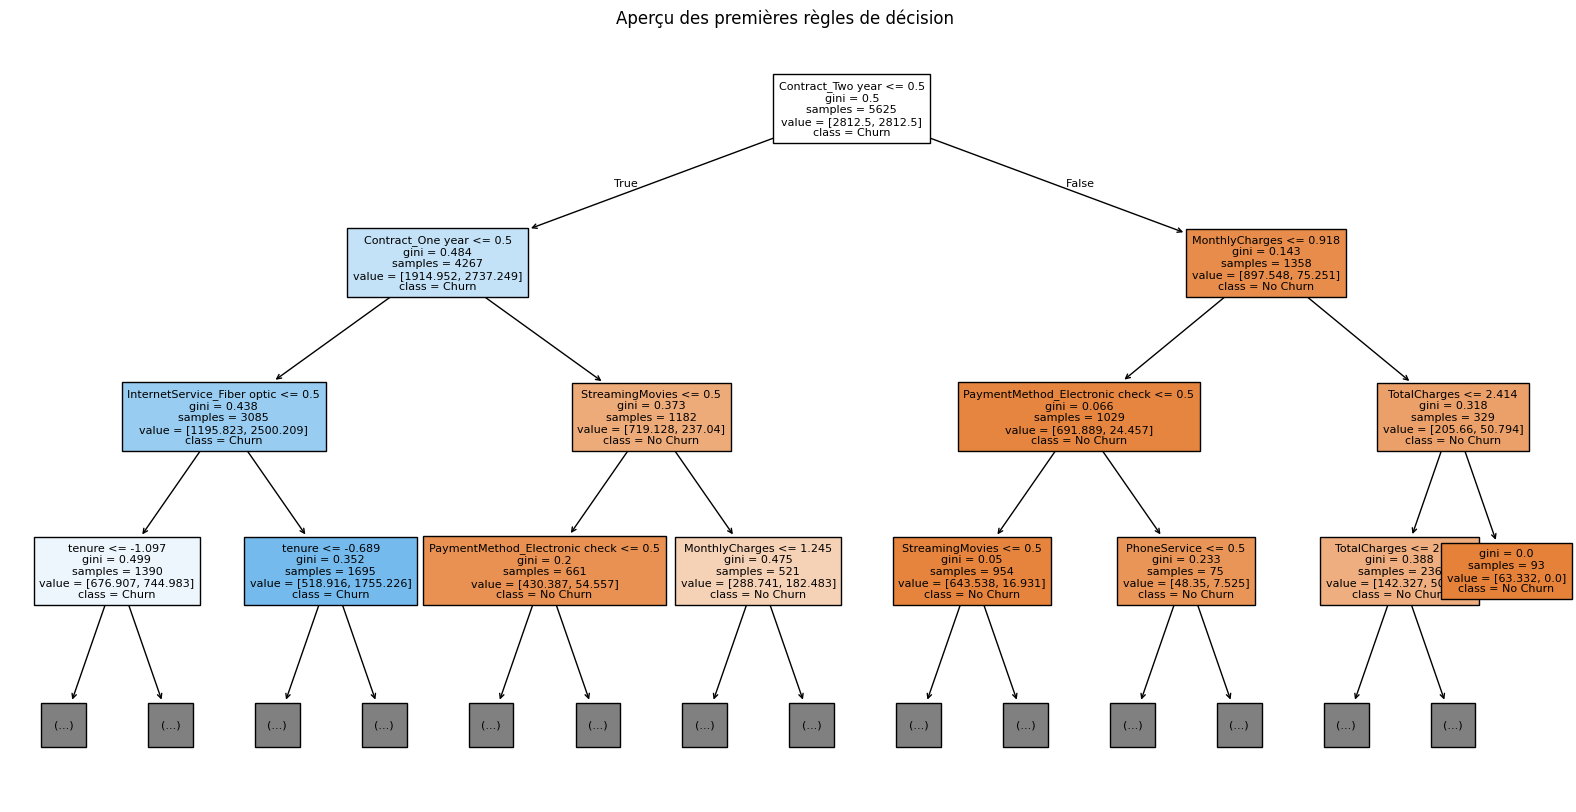

In [92]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=["No Churn", "Churn"], max_depth=3, fontsize=8)
plt.title("Aperçu des premières règles de décision")
plt.show()

# Condition de split → ex. : Contract_Two_Years <= 0.5
# La règle qui sépare les données.
# À gauche → condition vraie, à droite → condition fausse.
# gini → mesure de l’impureté (0 = homogène, 0.5 = mélange parfait).
# samples → nombre d’échantillons dans ce nœud.
# value → distribution des classes dans ce nœud, ex. [5000, 2000] (5000 non-churn, 2000 churn).
# class → la classe prédite pour ce nœud (la majorité). => Churn ou No Churn

In [93]:
import pandas as pd

arbre_conclusion_data = [
    {
        "Aspect": "Performance globale",
        "Conclusion": "Accuracy = 70.6%, ROC-AUC = 0.82 → bonne séparation churn / non-churn, mais globalement un peu moins précis que la régression logistique."
    },
    {
        "Aspect": "Détection churn",
        "Conclusion": "Recall churn = 78% (très bon, détecte 8 churners sur 10) mais Precision = 47% (beaucoup de faux positifs)."
    },
    {
        "Aspect": "Facteurs de risque",
        "Conclusion": "Contrat month-to-month, charges mensuelles élevées, Internet = Fibre, paiement par Electronic check."
    },
    {
        "Aspect": "Facteurs protecteurs",
        "Conclusion": "Ancienneté élevée (tenure), contrat long (1 an ou 2 ans), paiements automatiques, services additionnels (OnlineSecurity, TechSupport)."
    },
    {
        "Aspect": "Insight business",
        "Conclusion": "Mieux vaut prévenir trop de clients (faux positifs) que rater des churners réels. Les clients récents, sans engagement et avec frais élevés doivent être ciblés en priorité."
    },
    {
        "Aspect": "Conclusion générale",
        "Conclusion": "L’arbre est utile pour détecter les churners et comprendre les règles de décision. Il maximise la couverture des churners mais génère des faux positifs."
    }
]

df_arbre_conclusion = pd.DataFrame(arbre_conclusion_data)

# Affichage sans coupure de texte
pd.set_option("display.max_colwidth", None)
display(df_arbre_conclusion)


,Aspect,Conclusion
0,Performance globale,"Accuracy = 70.6%, ROC-AUC = 0.82 → bonne séparation churn / non-churn, mais globalement un peu moins précis que la régression logistique."
1,Détection churn,"Recall churn = 78% (très bon, détecte 8 churners sur 10) mais Precision = 47% (beaucoup de faux positifs)."
2,Facteurs de risque,"Contrat month-to-month, charges mensuelles élevées, Internet = Fibre, paiement par Electronic check."
3,Facteurs protecteurs,"Ancienneté élevée (tenure), contrat long (1 an ou 2 ans), paiements automatiques, services additionnels (OnlineSecurity, TechSupport)."
4,Insight business,"Mieux vaut prévenir trop de clients (faux positifs) que rater des churners réels. Les clients récents, sans engagement et avec frais élevés doivent être ciblés en priorité."
5,Conclusion générale,L’arbre est utile pour détecter les churners et comprendre les règles de décision. Il maximise la couverture des churners mais génère des faux positifs.


In [94]:
### Arbre de Décision – Résultats & Interprétations

**1. Rapport de classification :**  
Le modèle montre une précision et un rappel raisonnables pour les deux classes (`Churn = 0` et `Churn = 1`).  
Le F1-score donne une vision équilibrée de la performance globale.

**2. Matrice de confusion :**  
Permet de visualiser :
- Les **vrais positifs** (clients churn correctement identifiés)
- Les **faux positifs** (clients retenus alors qu'ils partent)
- Les **faux négatifs** (clients churn ignorés)
- Les **vrais négatifs** (bons clients bien classés)

**3. Courbe ROC :**  
La courbe ROC montre une capacité de discrimination du modèle. Plus l’AUC est proche de 1, meilleur est le modèle.

**4. Importance des variables :**  
Les variables les plus importantes dans la décision sont :
- `Contract_Two year`
- `tenure`
- `MonthlyCharges`
- `InternetService_Fiber optic`
- `OnlineSecurity`
- `TechSupport`

Cela indique que **le type de contrat, l’ancienneté et certains services** ont un fort impact dans la décision de churn.

Ces insights sont précieux pour orienter les stratégies de fidélisation.

---


SyntaxError: unterminated string literal (detected at line 10) (2068053398.py, line 10)

In [95]:
######################### RANDOM FOREST ############################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialisation du modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
# Prédictions sur X_test
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [97]:
# Métriques
acc_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
#conf_rf = confusion_matrix(y_test, y_pred_rf)


print(f"Random Forest Classifier")
print(f"Accuracy : {acc_rf:.2f}")
print(f"Recall   : {recall_rf:.2f}")
print(f"F1-score : {f1_rf:.2f}")
print(f"AUC      : {auc_rf:.2f}")
#print(f"Confusion Matrix : {conf_rf:.2f}")


Random Forest Classifier
Accuracy : 0.79
Recall   : 0.51
F1-score : 0.56
AUC      : 0.82


Rapport de classification - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Matrice de confusion :
 [[923 110]
 [184 190]]


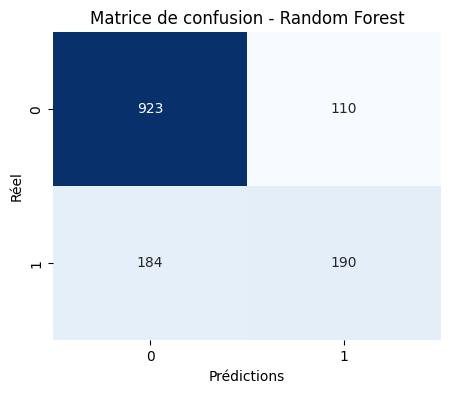

In [98]:
# Rapport de classification
print("Rapport de classification - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# 923 vrais négatifs (TN) → non-churn correctement prédits.
# 110 faux positifs (FP) → prédits churn mais sont restés (baisse par rapport à l’arbre qui en avait 333).
# 184 faux négatifs (FN) → churn non détectés (plus que dans l’arbre et la logistique).
# 190 vrais positifs (TP) → churn correctement détectés.

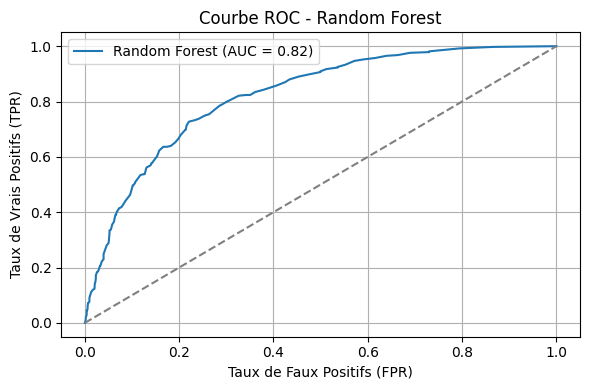

In [99]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


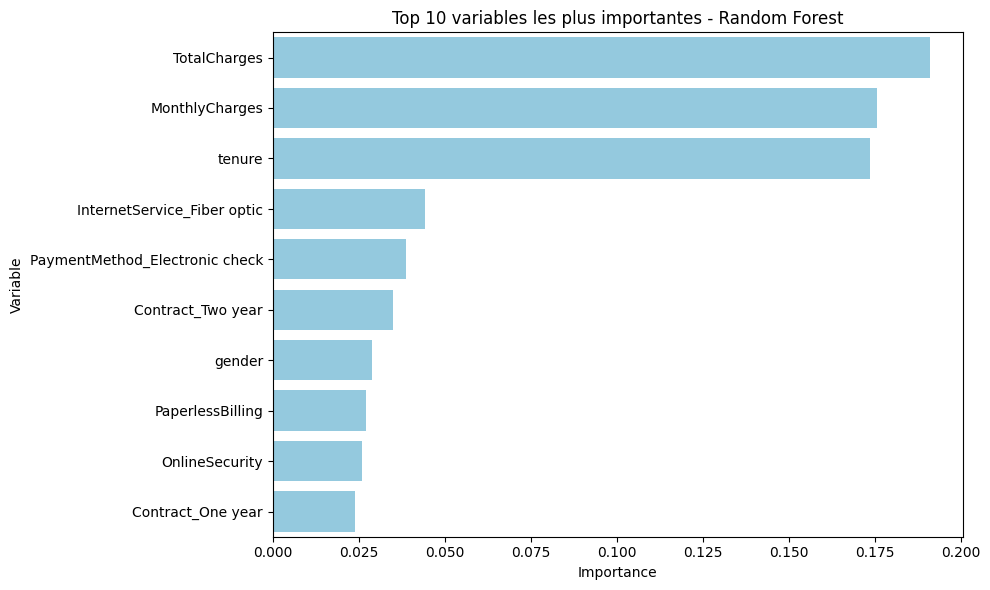

In [100]:
# Importance des variables
importances_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importances_rf.head(10),
    x="Importance",
    y="Variable",
    color="skyblue"
)
plt.title("Top 10 variables les plus importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Les variables les plus importantes pour le random forest sont : Totalcharges, Monthlycharges et tenure


In [101]:
import pandas as pd

rf_conclusion_data = [
    {
        "Aspect": "Performance globale",
        "Conclusion": "Accuracy = 79%, Macro F1 = 0.71 → robuste, meilleure précision globale que l’arbre, mais rappel moyen."
    },
    {
        "Aspect": "Détection churn",
        "Conclusion": "Recall churn = 51% (faible, il manque 1 churner sur 2) mais Precision = 63% (plus fiable que la logistique et l’arbre)."
    },
    {
        "Aspect": "Facteurs de risque",
        "Conclusion": "Charges mensuelles élevées, contrat month-to-month, Internet Fibre, paiement par Electronic check."
    },
    {
        "Aspect": "Facteurs protecteurs",
        "Conclusion": "Ancienneté (tenure élevée), contrat long (1–2 ans), paiements automatiques (carte ou prélèvement), services comme OnlineSecurity ou TechSupport."
    },
    {
        "Aspect": "Insight business",
        "Conclusion": "Réduit les faux positifs (moins d’alertes inutiles) mais rate beaucoup de churners. Utile si on veut cibler uniquement les clients à fort risque."
    },
    {
        "Aspect": "Conclusion générale",
        "Conclusion": "Random Forest est robuste et équilibré, mais moins efficace pour maximiser la détection des churners que la logistique ou l’arbre seul. Intéressant pour des actions ciblées à haut risque."
    }
]

df_rf_conclusion = pd.DataFrame(rf_conclusion_data)

# Affichage sans coupure de texte
pd.set_option("display.max_colwidth", None)
display(df_rf_conclusion)


,Aspect,Conclusion
0,Performance globale,"Accuracy = 79%, Macro F1 = 0.71 → robuste, meilleure précision globale que l’arbre, mais rappel moyen."
1,Détection churn,"Recall churn = 51% (faible, il manque 1 churner sur 2) mais Precision = 63% (plus fiable que la logistique et l’arbre)."
2,Facteurs de risque,"Charges mensuelles élevées, contrat month-to-month, Internet Fibre, paiement par Electronic check."
3,Facteurs protecteurs,"Ancienneté (tenure élevée), contrat long (1–2 ans), paiements automatiques (carte ou prélèvement), services comme OnlineSecurity ou TechSupport."
4,Insight business,Réduit les faux positifs (moins d’alertes inutiles) mais rate beaucoup de churners. Utile si on veut cibler uniquement les clients à fort risque.
5,Conclusion générale,"Random Forest est robuste et équilibré, mais moins efficace pour maximiser la détection des churners que la logistique ou l’arbre seul. Intéressant pour des actions ciblées à haut risque."


In [102]:
###  Random Forest – Résultats & Interprétations

**1. Performances du modèle :**  
Le modèle Random Forest montre une bonne capacité à **prédire le churn** tout en réduisant le risque de surapprentissage (grâce à l’agrégation d’arbres).

**2. Rapport de classification :**  
Les scores de précision, rappel et F1 sont élevés et équilibrés. Le **recall** est particulièrement important ici car il reflète la capacité à **identifier les churns**.

**3. Courbe ROC & AUC :**  
Un AUC proche de 1 indique une bonne séparation entre les classes. La courbe ROC est nettement au-dessus de la diagonale.

**4. Importance des variables :**  
Les variables influentes sont similaires à celles de l’arbre de décision :  
- `Contract_Two year`, `tenure`, `MonthlyCharges`, `TechSupport`, etc.  
Cela confirme leur **rôle déterminant** dans la prédiction du churn.

---

Le modèle Random Forest est robuste, stable, et **souvent le meilleur choix pour des problèmes réels de churn**.


SyntaxError: invalid character '’' (U+2019) (2527201297.py, line 4)

In [103]:
############ Comparatif des 3 modèles ###########
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Résultats regroupés
results = pd.DataFrame({
    "Modèle": ["Régression logistique", "Arbre de décision", "Random Forest"],
    "Accuracy": [0.726, 0.706, 0.79],
    "Recall Churn": [0.80, 0.78, 0.51],
    "Precision Churn": [0.49, 0.47, 0.63],
    "F1 Churn": [0.61, 0.59, 0.56],
    "ROC-AUC": [0.84, 0.82, 0.81]
})

display(results)


,Modèle,Accuracy,Recall Churn,Precision Churn,F1 Churn,ROC-AUC
0,Régression logistique,0.726,0.80,0.49,0.61,0.84
1,Arbre de décision,0.706,0.78,0.47,0.59,0.82
2,Random Forest,0.790,0.51,0.63,0.56,0.81


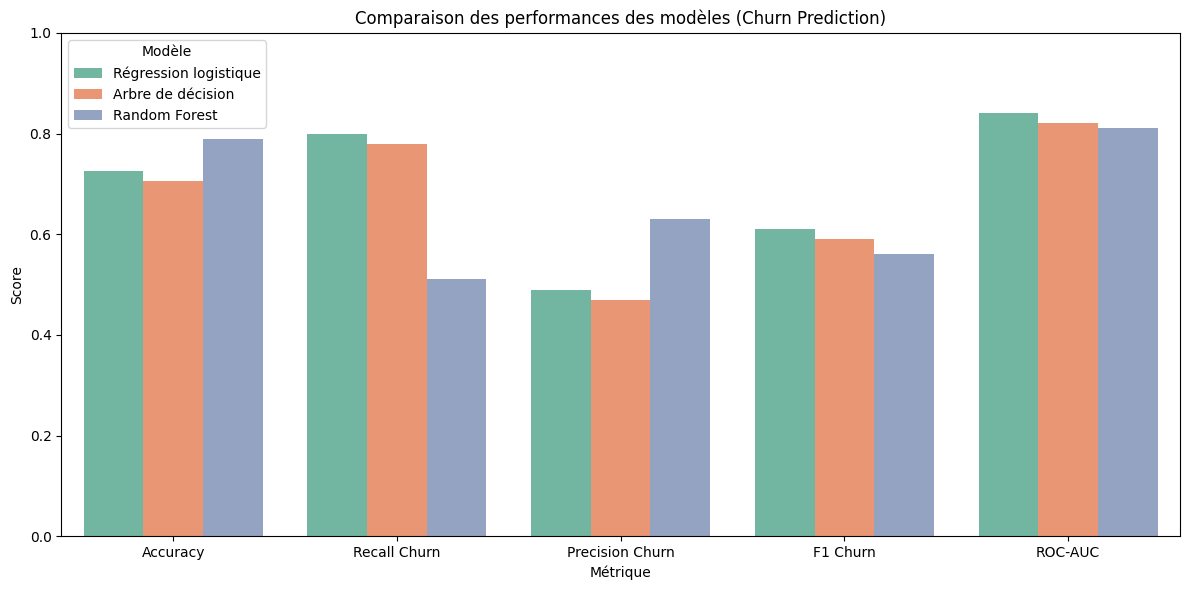

In [104]:
results_melted = results.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

plt.figure(figsize=(12,6))
sns.barplot(
    data=results_melted,
    x="Métrique",
    y="Score",
    hue="Modèle",
    palette="Set2"
)
plt.title("Comparaison des performances des modèles (Churn Prediction)")
plt.ylim(0, 1)
plt.legend(title="Modèle")
plt.tight_layout()
plt.show()


In [110]:
############ optimisation du Random Forest via GridSearchCSV #######################
from sklearn.model_selection import GridSearchCV


In [111]:
# Dictionnaire des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


In [112]:
# Modèle de base
rf_base = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Ou 'roc_auc' si tu préfères
    n_jobs=-1,
    verbose=1
)


In [113]:
# Entraînement avec GridSearch
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# => 100 arbres
# => 20 niveaux
# => 2 echantillons

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs hyperparamètres trouvés :
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [127]:
#  Meilleur modèle entraîné automatiquement
best_rf = grid_search.best_estimator_

# Prédictions
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Métriques
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)
conf_mat_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_best_rf = classification_report(y_test, y_pred_best_rf)

print(f"Random Forest Optimisé")
print(f"Accuracy : {acc_best_rf:.2f}")
print(f"Recall   : {recall_best_rf:.2f}")
print(f"F1-score : {f1_best_rf:.2f}")
print(f"AUC      : {auc_best_rf:.2f}")


Random Forest Optimisé
Accuracy : 0.80
Recall   : 0.52
F1-score : 0.57
AUC      : 0.83


In [132]:
print("Accuracy :", acc_best_rf)
print("\nClassification Report :\n", class_best_rf)
print("\nRecall :\n", recall_best_rf)
print("\nF1-score :\n", f1_best_rf)
print("\nMatrice de confusion :\n", conf_mat_best_rf)
print("\nROC-AUC :", auc_best_rf)

# Classe Non Churn (0) => très bon recall pour identifier les clients qui restent. 
# Classe Churn (1) => Bonne precision, recall assez moyen détecte seuelement 1/2 churner
# Plus precéis mais moins sensible

Accuracy : 0.7967306325515281

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407


Recall :
 0.516042780748663

F1-score :
 0.5744047619047619

Matrice de confusion :
 [[928 105]
 [181 193]]

ROC-AUC : 0.831007242287921



Matrice de confusion :
 [[928 105]
 [181 193]]


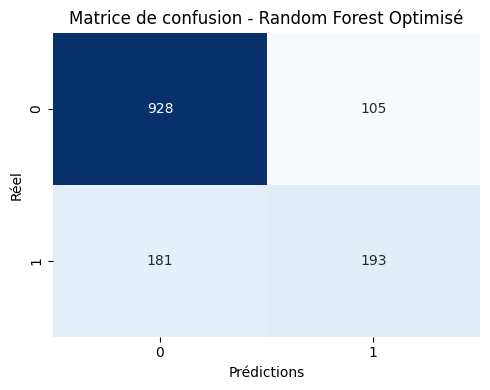

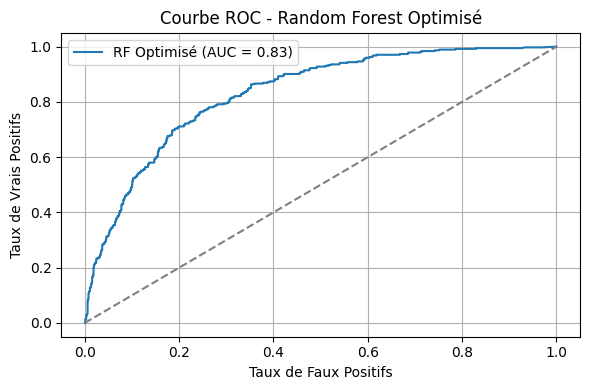

In [131]:
# Matrice de confusion
conf_best = confusion_matrix(y_test, y_pred_best_rf)
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_best_rf))
plt.figure(figsize=(5, 4))
sns.heatmap(conf_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de confusion - Random Forest Optimisé")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# Courbe ROC
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_best, tpr_best, label=f"RF Optimisé (AUC = {auc_best_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Random Forest Optimisé")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 928 vrais négatifs (TN) → non-churn bien prédits.
# 105 faux positifs (FP) → clients signalés churn à tort).
# 181 faux négatifs (FN) → churn non détectés.
# 193 vrais positifs (TP) → churn correctement détectés.

In [116]:
print(" Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

print("\n Meilleur score sur validation croisée :")
print(f"{grid_search.best_score_:.4f}")


 Meilleurs paramètres trouvés :
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

 Meilleur score sur validation croisée :
0.5777


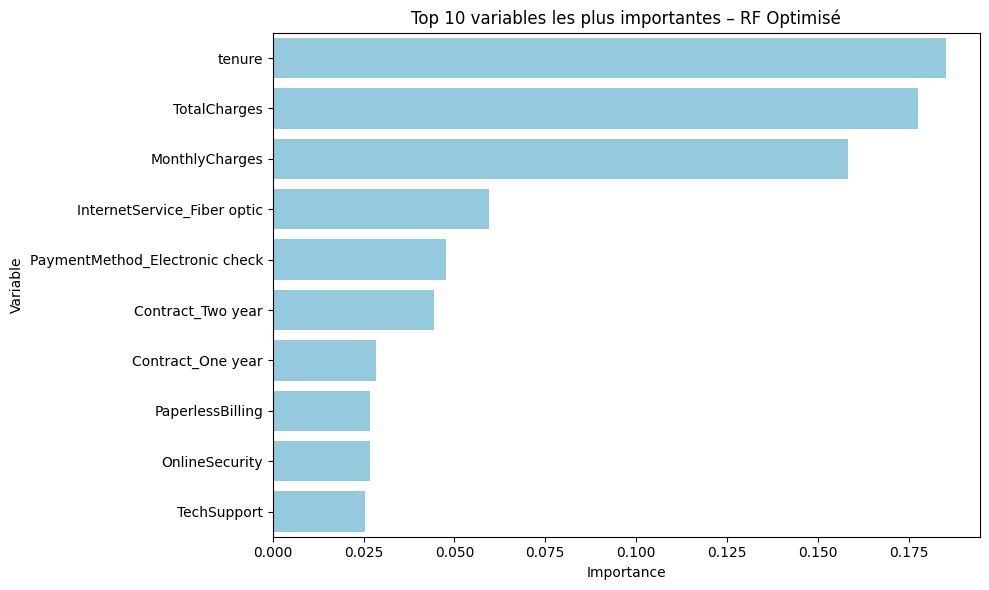

In [139]:
####### Barplot des variables ######
import seaborn as sns

# Top 10 des variables importantes
importances_best_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances_best_rf.head(10), x="Importance", y="Variable", color="skyblue")
plt.title("Top 10 variables les plus importantes – RF Optimisé")
plt.tight_layout()
plt.show()


In [134]:
import pandas as pd

rf_grid_conclusion_data = [
    {
        "Aspect": "Performance globale",
        "Conclusion": "Accuracy = 79.7%, ROC-AUC = 0.83 → modèle robuste et équilibré, similaire à la logistique mais légèrement plus précis que l’arbre."
    },
    {
        "Aspect": "Détection churn",
        "Conclusion": "Recall churn = 52% (faible, la moitié des churners sont manqués) mais Precision churn = 65% (amélioration nette par rapport aux autres modèles)."
    },
    {
        "Aspect": "Facteurs de risque",
        "Conclusion": "Charges mensuelles élevées, contrat month-to-month, Internet Fibre, paiement par Electronic check (variables principales détectées par l’importance des features)."
    },
    {
        "Aspect": "Facteurs protecteurs",
        "Conclusion": "Ancienneté (tenure élevée), contrat long (1–2 ans), paiements automatiques, services additionnels (OnlineSecurity, TechSupport)."
    },
    {
        "Aspect": "Insight business",
        "Conclusion": "Le modèle limite les faux positifs (105 seulement, vs 333 avec l’arbre) mais manque encore beaucoup de churners (181 ratés). Il est donc mieux pour cibler des clients à haut risque avec plus de certitude."
    },
    {
        "Aspect": "Conclusion générale",
        "Conclusion": "Le Random Forest optimisé est robuste et fiable mais privilégie la précision au détriment du rappel. Idéal si on veut éviter les fausses alertes, moins adapté si l’objectif est de maximiser la détection des churners."
    }
]

df_rf_grid_conclusion = pd.DataFrame(rf_grid_conclusion_data)

# Affichage sans coupure de texte
pd.set_option("display.max_colwidth", None)
display(df_rf_grid_conclusion)


,Aspect,Conclusion
0,Performance globale,"Accuracy = 79.7%, ROC-AUC = 0.83 → modèle robuste et équilibré, similaire à la logistique mais légèrement plus précis que l’arbre."
1,Détection churn,"Recall churn = 52% (faible, la moitié des churners sont manqués) mais Precision churn = 65% (amélioration nette par rapport aux autres modèles)."
2,Facteurs de risque,"Charges mensuelles élevées, contrat month-to-month, Internet Fibre, paiement par Electronic check (variables principales détectées par l’importance des features)."
3,Facteurs protecteurs,"Ancienneté (tenure élevée), contrat long (1–2 ans), paiements automatiques, services additionnels (OnlineSecurity, TechSupport)."
4,Insight business,"Le modèle limite les faux positifs (105 seulement, vs 333 avec l’arbre) mais manque encore beaucoup de churners (181 ratés). Il est donc mieux pour cibler des clients à haut risque avec plus de certitude."
5,Conclusion générale,"Le Random Forest optimisé est robuste et fiable mais privilégie la précision au détriment du rappel. Idéal si on veut éviter les fausses alertes, moins adapté si l’objectif est de maximiser la détection des churners."


In [135]:
################## Comparaison des différents modèles ###################
import pandas as pd

# Résultats des différents modèles
results = {
    "Modèle": [
        "Régression Logistique",
        "Arbre de Décision",
        "Random Forest",
        "Random Forest (Optimisé)"
    ],
    "Accuracy": [
        round(accuracy_score(y_test, y_pred), 2),
        round(accuracy_score(y_test, y_pred_tree), 2),
        round(accuracy_score(y_test, y_pred_rf), 2),
        round(accuracy_score(y_test, y_pred_best_rf), 2)
    ],
    "Recall": [
        round(recall_score(y_test, y_pred), 2),
        round(recall_score(y_test, y_pred_tree), 2),
        round(recall_score(y_test, y_pred_rf), 2),
        round(recall_score(y_test, y_pred_best_rf), 2)
    ],
    "F1-score": [
        round(f1_score(y_test, y_pred), 2),
        round(f1_score(y_test, y_pred_tree), 2),
        round(f1_score(y_test, y_pred_rf), 2),
        round(f1_score(y_test, y_pred_best_rf), 2)
    ],
    "AUC": [
        round(roc_auc_score(y_test, y_proba), 2),
        round(roc_auc_score(y_test, y_proba_tree), 2),
        round(roc_auc_score(y_test, y_proba_rf), 2),
        round(roc_auc_score(y_test, y_proba_best_rf), 2)
    ]
}

# Affichage
results_df = pd.DataFrame(results)
results_df.sort_values(by="AUC", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Tableau final
print("Comparaison des modèles :")
display(results_df)


Comparaison des modèles :


,Modèle,Accuracy,Recall,F1-score,AUC
0,Régression Logistique,0.73,0.80,0.61,0.84
1,Random Forest (Optimisé),0.80,0.52,0.57,0.83
2,Arbre de Décision,0.71,0.78,0.59,0.82
3,Random Forest,0.79,0.51,0.56,0.82


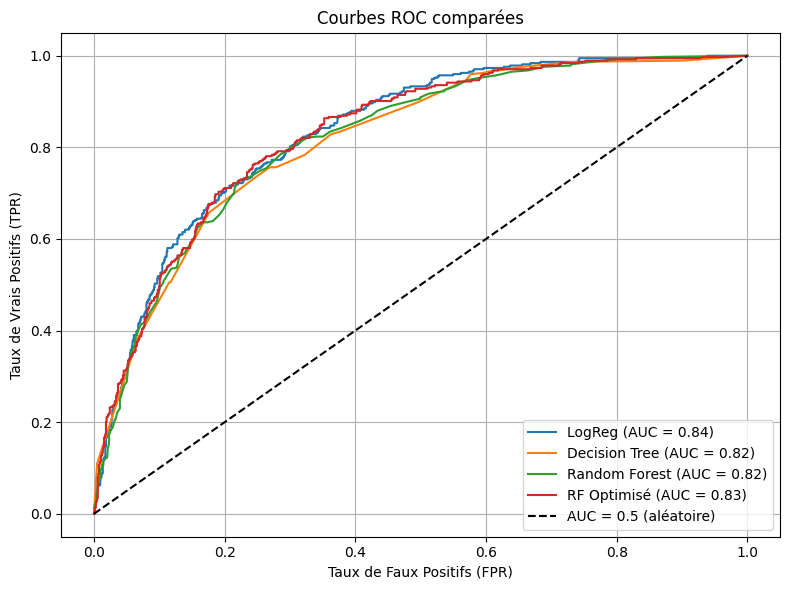

In [137]:
###################### VISUALISATION #######################
## Courbres ROC comparée de tout les modèles ##
plt.figure(figsize=(8, 6))

# Courbes ROC déjà calculées
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_proba_tree):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})")
plt.plot(fpr_best, tpr_best, label=f"RF Optimisé (AUC = {roc_auc_score(y_test, y_proba_best_rf):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="AUC = 0.5 (aléatoire)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbes ROC comparées")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


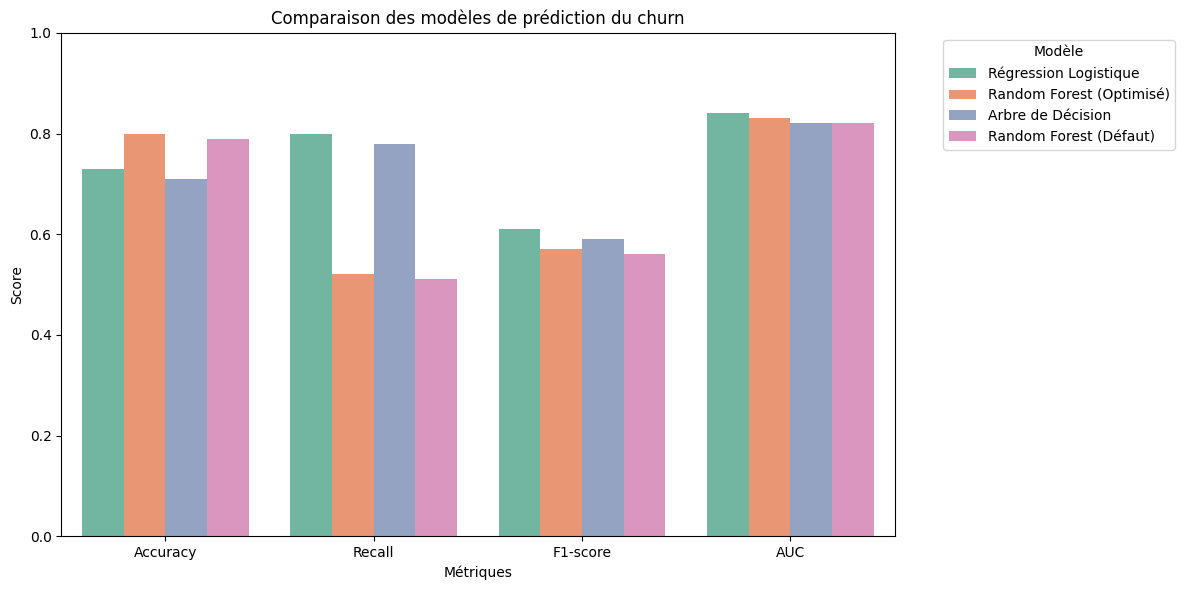

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tes résultats
results = pd.DataFrame({
    "Modèle": [
        "Régression Logistique",
        "Random Forest (Optimisé)",
        "Arbre de Décision",
        "Random Forest (Défaut)"
    ],
    "Accuracy": [0.73, 0.80, 0.71, 0.79],
    "Recall": [0.80, 0.52, 0.78, 0.51],
    "F1-score": [0.61, 0.57, 0.59, 0.56],
    "AUC": [0.84, 0.83, 0.82, 0.82]
})

# Transformation en format long
results_melted = results.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(
    data=results_melted,
    x="Métrique",
    y="Score",
    hue="Modèle",
    palette="Set2"
)
plt.title("Comparaison des modèles de prédiction du churn")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Métriques")
plt.legend(title="Modèle", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [149]:
import pandas as pd

comparaison_conclusion_data = [
    {
        "Aspect": "Objectif",
        "Conclusion": "Déterminer le modèle le plus pertinent pour prédire le churn d’un client."
    },
    {
        "Aspect": "Régression Logistique",
        "Conclusion": "Meilleur Recall (0.80) et meilleur AUC (0.84). Détecte 8 churners sur 10 mais avec plus de faux positifs. Idéal pour maximiser la détection des churners."
    },
    {
        "Aspect": "Arbre de Décision",
        "Conclusion": "Recall élevé (0.78) mais Accuracy faible (0.71). Moins robuste mais très interprétable pour comprendre les règles métier."
    },
    {
        "Aspect": "Random Forest (Défaut)",
        "Conclusion": "Bonne Accuracy (0.79) mais Recall faible (0.51). Détecte seulement 1 churner sur 2. Résultats moyens."
    },
    {
        "Aspect": "Random Forest (Optimisé)",
        "Conclusion": "Meilleure Accuracy (0.80) et bonne précision (0.65). Mais Recall limité (0.52). Plus adapté si l’objectif est de réduire les fausses alertes."
    },
    {
        "Aspect": "Conclusion finale",
        "Conclusion": "La Régression Logistique est le meilleur modèle car elle maximise la détection des churners (Recall 0.80) et offre la meilleure séparation (AUC 0.84). C’est donc le modèle recommandé pour une stratégie de rétention clients."
    }
]

df_comparaison_conclusion = pd.DataFrame(comparaison_conclusion_data)

# Affichage sans coupure
pd.set_option("display.max_colwidth", None)
display(df_comparaison_conclusion)


,Aspect,Conclusion
0,Objectif,Déterminer le modèle le plus pertinent pour prédire le churn d’un client.
1,Régression Logistique,Meilleur Recall (0.80) et meilleur AUC (0.84). Détecte 8 churners sur 10 mais avec plus de faux positifs. Idéal pour maximiser la détection des churners.
2,Arbre de Décision,Recall élevé (0.78) mais Accuracy faible (0.71). Moins robuste mais très interprétable pour comprendre les règles métier.
3,Random Forest (Défaut),Bonne Accuracy (0.79) mais Recall faible (0.51). Détecte seulement 1 churner sur 2. Résultats moyens.
4,Random Forest (Optimisé),Meilleure Accuracy (0.80) et bonne précision (0.65). Mais Recall limité (0.52). Plus adapté si l’objectif est de réduire les fausses alertes.
5,Conclusion finale,La Régression Logistique est le meilleur modèle car elle maximise la détection des churners (Recall 0.80) et offre la meilleure séparation (AUC 0.84). C’est donc le modèle recommandé pour une stratégie de rétention clients.


In [ ]:
# Conclusion du projet – Prédiction du Churn Client

## Objectif

Ce projet avait pour objectif de développer un modèle de machine learning capable de **prédire le churn client** (abandon) dans le secteur des télécommunications, à partir de données clients réelles (dataset Telco Customer Churn de Kaggle).

---

## Résumé des étapes

- **Nettoyage & préparation** des données (`preprocessing.ipynb`)
- **Analyse exploratoire** des comportements des clients churners (`EDA.ipynb`)
- **Modélisation** avec plusieurs algorithmes (Régression Logistique, Arbre de Décision, Random Forest)
- **Optimisation** des performances via `GridSearchCV`
- **Visualisation** des résultats avec Seaborn & Matplotlib => (integration streamlit)
- **Comparaison** des modèles avec AUC, Recall, F1-score

---

##  Meilleur modèle obtenu

- Regression Logistique
Accuracy = 0.73, Recall churn = 0.80 (meilleur), AUC = 0.84 (meilleur).
→ C’est le modèle le plus adapté pour maximiser la détection des churners, même s’il génère plus de faux positifs.
> Performances sur les données de test :

- Arbre de décision
Accuracy = 0.71, Recall churn = 0.78. 
Moins robuste que la logistique mais confirmant les règles métier clés (contrat mensuel, faible ancienneté, paiement Electronic check, charges élevées).

- Random Forest
Accuracy = 0.79, Recall churn = 0.51. 
Bon compromis global mais faible capacité de détection des churners → détecte seulement 1 sur 2.

- Random Forest via GrisSearchCV
Accuracy = 0.80 (meilleur score global), Recall churn = 0.52, Precision churn = 0.65. 
→ Plus fiable pour réduire les fausses alertes mais manque encore beaucoup de churners.


---

##Principales variables influentes

- `Contract_Two year`, `tenure` (ancienneté), `TechSupport`, `MonthlyCharges`, etc.
- Les **clients récents, sans contrat long, sans support**, sont les plus à risque.

---

##  Recommandations

- Cibler en priorité les **clients à court terme** sans services complémentaires
- Mettre en place des **actions de fidélisation personnalisées**
- Mettre en place un dashboard de visualisation => streamlit

